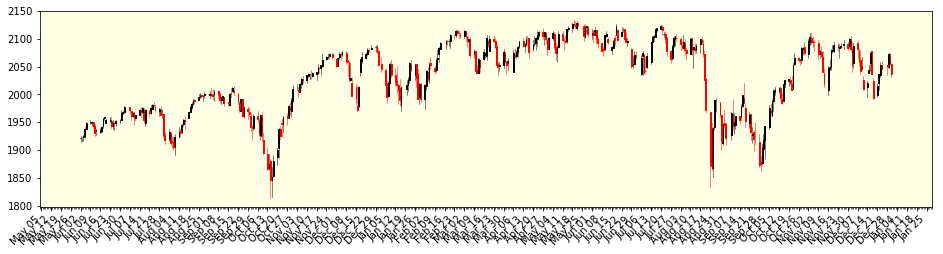

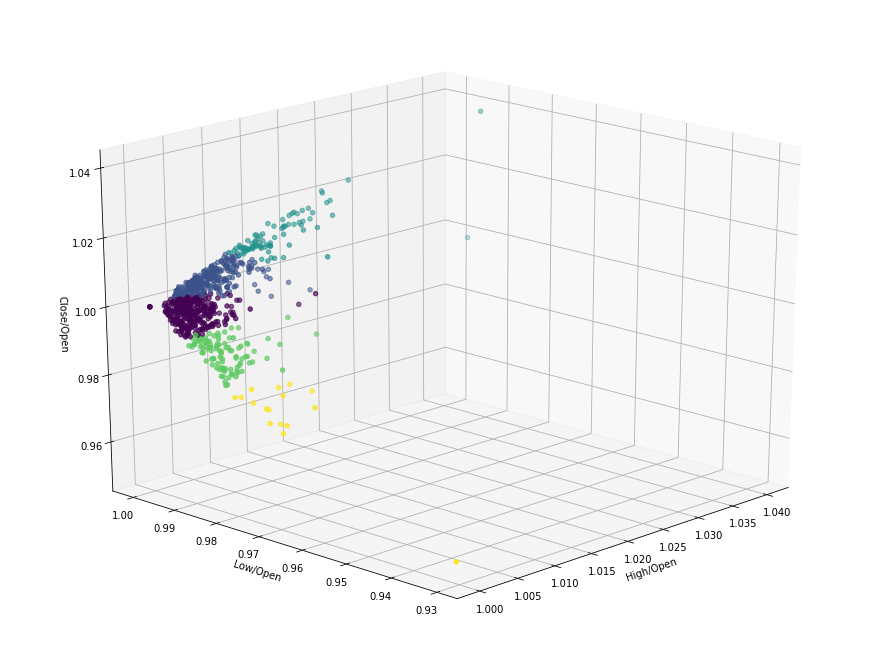

In [61]:
import copy
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import (
DateFormatter,WeekdayLocator,DayLocator,MONDAY
)
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from sklearn.cluster import KMeans



start = datetime.datetime(2013,1,1)
end = datetime.datetime(2015,12,31)
sp500 = web.DataReader('CHRIS/CME_SP1','quandl',start,end,access_key = 'RGqizhsWNp9P1gM7wx5u')

#plot_candlesticks(sp500,datetime.datetime(2014,6,1))
data = sp500
since = datetime.datetime(2014,6,1)
df = copy.deepcopy(data)
df = df[df.index >= since]
df.reset_index(inplace = True)
df['date_fmt'] = df['Date'].apply(lambda date :mdates.date2num(date.to_pydatetime()))
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
fig,ax = plt.subplots(figsize = (16,4))
fig.subplots_adjust(bottom =0.2) 
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

csticks = candlestick_ohlc(ax,df[['date_fmt','Open','High','Low','Last']].values,width = 0.6,
                          colorup = '#000000',colordown = '#ff0000')
ax.set_facecolor((1,1,0.9))  
plt.setp(plt.gca().get_xticklabels(),
         rotation = 45,horizontalalignment = 'right')
plt.show()


def get_open_normalized_prices(df):
    df['H/O'] = df['High']/df['Open']
    df['L/O'] = df['Low']/df['Open']
    df['C/O'] = df['Last']/df['Open']
    df.drop(['Open','High','Low','Last','Change','Settle','Volume','PreviousDayOpenInterest'],axis = 1,inplace = True)
    return df
sp500_norm = get_open_normalized_prices(sp500)
k = 5
km = KMeans(n_clusters = k,random_state = 42)
km.fit(sp500_norm)
labels = km.labels_
sp500['Cluster'] = labels

#plot_3d_normalized_candles(sp500_norm)
data = sp500_norm
fig = plt.figure(figsize = (12,9))
ax = Axes3D(fig,elev = 21,azim = -136)
ax.scatter(
     data['H/O'],data['L/O'],data['C/O'],c = labels.astype(np.float))
ax.set_xlabel('High/Open')
ax.set_ylabel('Low/Open')
ax.set_zlabel('Close/Open') 
plt.show()

In [62]:
def create_follow_cluster_matrix(data):
    data['ClusterTomorrow'] = data['Cluster'].shift(-1)
    data.dropna(inplace = True)
    data['ClusterTomorrow'] = data['ClusterTomorrow'].apply(int)
    sp500['ClusterMatrix'] = list(zip(data['Cluster'],data['ClusterTomorrow']))
    cmvc = data['ClusterMatrix'].value_counts()
    clust_mat = np.zeros((k,k))
    
    for row in cmvc.iteritems():
        clust_mat[row[0]] = row[1] *100/len(data)
    print('Cluster Follow-on Matrix:')
    print(clust_mat)
create_follow_cluster_matrix(sp500)

Cluster Follow-on Matrix:
[[16.1589404  15.49668874  3.70860927  3.8410596   0.66225166]
 [14.30463576 10.86092715  3.97350993  3.97350993  0.26490066]
 [ 4.2384106   2.1192053   1.7218543   2.51655629  0.52980132]
 [ 4.76821192  4.2384106   1.58940397  2.51655629  0.39735099]
 [ 0.39735099  0.66225166  0.26490066  0.52980132  0.26490066]]


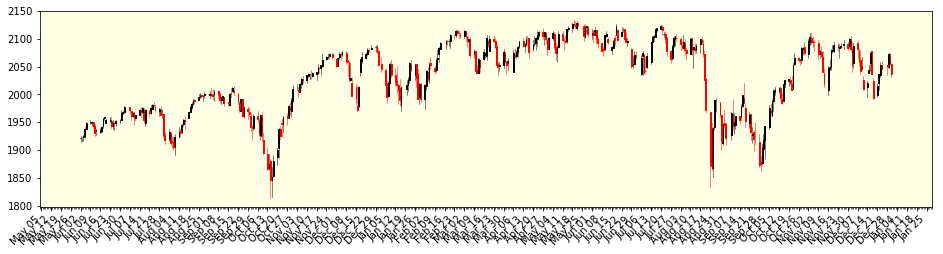

KeyError: "['Low', 'High', 'Last', 'Open'] not in index"

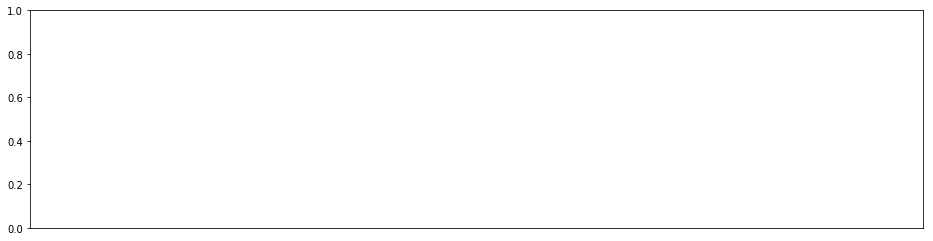

In [65]:
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2015,12,31)
sp500 = web.DataReader('CHRIS/CME_SP1','quandl',start,end,access_key = 'RGqizhsWNp9P1gM7wx5u')
def plot_candlesticks(data,since):
    df = copy.deepcopy(data)
    df = df[df.index >= since]
    df.reset_index(inplace = True)
    df['date_fmt'] = df['Date'].apply(lambda date :mdates.date2num(date.to_pydatetime()))
    
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    weekFormatter = DateFormatter('%b %d')
    fig,ax = plt.subplots(figsize = (16,4))
    fig.subplots_adjust(bottom = 0.2)
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)
    
    csticks = candlestick_ohlc(ax,df[['date_fmt','Open','High','Low','Last']].values,width = 0.6,
                               colorup = '#000000',colordown = '#ff0000')
    ax.set_facecolor((1,1,0.9))
    #ax.xaxis.date()
    plt.setp(plt.gca().get_xticklabels(),
            rotation = 45,horizontalalignment = 'right')
    plt.show()
plot_candlesticks(sp500,datetime.datetime(2014,6,1))

sp500_norm = get_open_normalized_prices(sp500)
k = 5
km = KMeans(n_clusters = k,random_state = 42)
km.fit(sp500_norm)
labels = km.labels_
sp500['Cluster'] = labels

data = sp500_norm
# def plot_cluster_ordered_candles(data):
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('')
fig,ax = plt.subplots(figsize = (16,4))
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

df = copy.deepcopy(data)
df.sort_values(by = 'Cluster',inplace = True)
df.reset_index(inplace = True)
df['clust_index'] = df.index
df['clust_change'] = df['Cluster'].diff()
change_indices = df[df['clust_change'] != 0]

csticks = candlestick_ohlc(ax,df[['clust_index','Open','High','Low','Last']].values,width = 0.6,
                          colorup = '#000000',colordown = '#ff0000')
ax.set_facecolor((1,1,0.9))

for row in change_indices.iterrows():
    plt.axvline(row[1]['clust_index'],linestyle = 'dashed',c = 'blue')

plt.xlim(0,len(df))
plt.setp(plt.gca().get_xticklabels(),rotation = 45,horizontalalignment = 'right')
plt.show()
# plot_3d_normalized_candles(sp500_norm)